In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rating=pd.read_csv('data/u.data',sep='\t',header=None,encoding='latin1',usecols=[0,1,2],names=['user_id','movie_id','rating','timestamp'])

In [3]:
rating.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
col = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown',
       'Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy',
       'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']


In [5]:
movie=pd.read_csv('data/u.item',sep='|',encoding='latin1',header=None,names=col)

In [6]:
movie.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
user=pd.read_csv('data/u.user',sep='|',header=None,encoding='latin1',names=['user_id','age','gender','occupation','zip_code'])

In [9]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## EDA

In [10]:
print("Total number of rating:", rating.shape[0])
print("There are in total {} users who provided rating.".format(len(rating['user_id'].unique())))
print("The maximum counts of rating per user:" , max(rating['user_id'].value_counts()))
print("The minimun counts of rating per user:" , min(rating['user_id'].value_counts()))

Total number of rating: 100000
There are in total 943 users who provided rating.
The maximum counts of rating per user: 737
The minimun counts of rating per user: 20


In [11]:
print("Total number of movie:", len(movie['movie_id'].unique()))
print("Total number of movie with rating:", len(rating['movie_id'].unique()))
print("The maximum counts of rating per movie:" , max(rating['movie_id'].value_counts()))
print("The minimun counts of rating per movie:" , min(rating['movie_id'].value_counts()))

Total number of movie: 1682
Total number of movie with rating: 1682
The maximum counts of rating per movie: 583
The minimun counts of rating per movie: 1


Text(0.5, 0, 'number of rating')

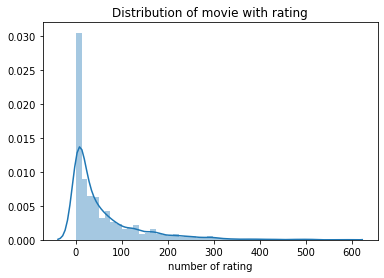

In [12]:
sns.distplot(rating.groupby('movie_id')['movie_id'].count().values)
plt.title("Distribution of movie with rating")
plt.xlabel("number of rating")

In [13]:
for i in range(1,11):
    print(f"There are {len(rating['movie_id'].value_counts()[rating['movie_id'].value_counts() == i].index)} movies with {i} rating.")

There are 141 movies with 1 rating.
There are 68 movies with 2 rating.
There are 60 movies with 3 rating.
There are 64 movies with 4 rating.
There are 51 movies with 5 rating.
There are 39 movies with 6 rating.
There are 44 movies with 7 rating.
There are 30 movies with 8 rating.
There are 33 movies with 9 rating.
There are 33 movies with 10 rating.


In [14]:
# check if there is duplicate values in rating or movie dataframe
print(rating.shape)
print(rating.drop_duplicates().shape)
# no duplicates

(100000, 3)
(100000, 3)


In [15]:
# check if there is duplicate values in rating or movie dataframe
print(movie.shape)
print(movie.drop_duplicates().shape)
# no duplicates

(1682, 24)
(1682, 24)


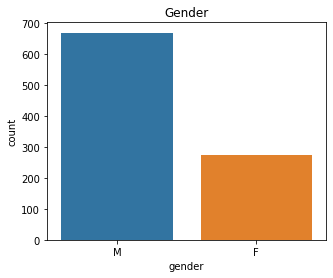

In [16]:
fig = plt.figure(figsize=(5,4))
sns.countplot(user.gender)
plt.title('Gender')
plt.style.use('seaborn-notebook')

Text(0.5, 1.0, 'Occupation')

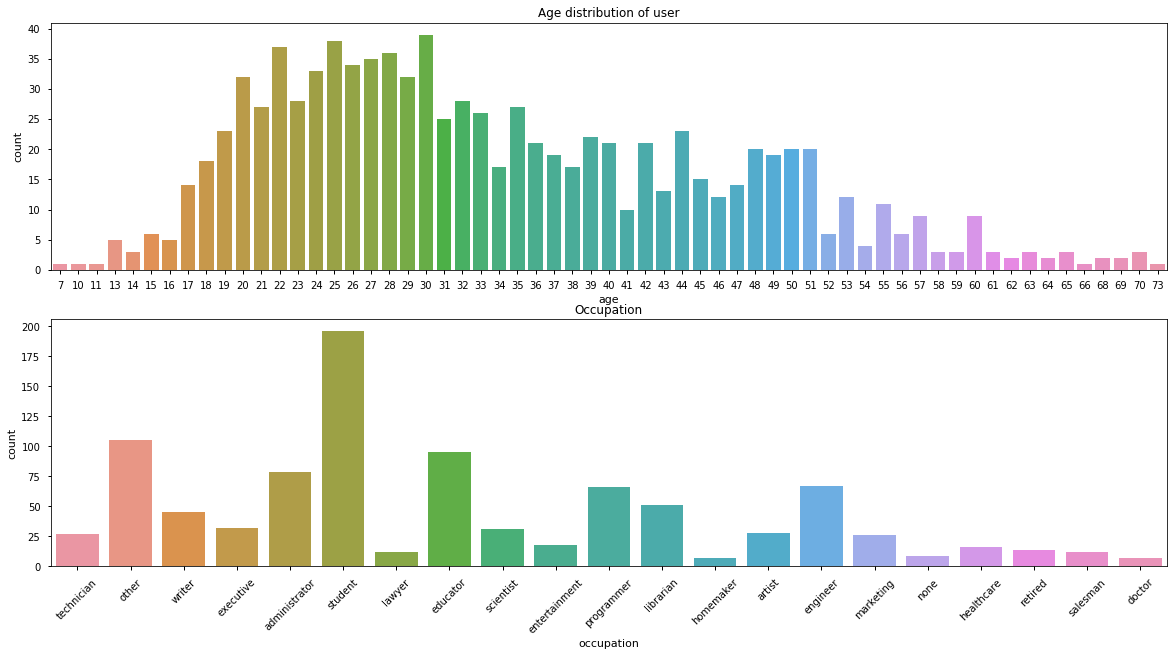

In [17]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(211)
sns.countplot(user.age)
plt.title('Age distribution of user')

fig.add_subplot(212)
sns.countplot(user.occupation)
plt.xticks(rotation=45)
plt.title('Occupation')

In [18]:
movie.loc[:,'unknown'].value_counts()
#There are 2 movie in un

0    1680
1       2
Name: unknown, dtype: int64

Text(0.5, 1.0, 'Movie genre')

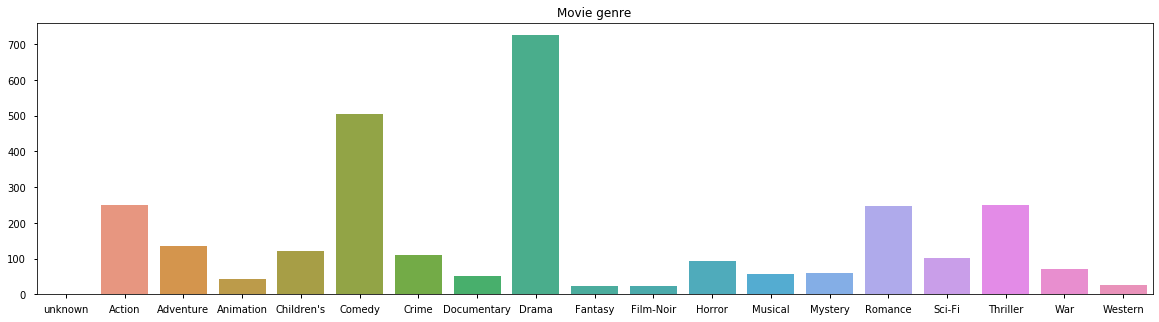

In [19]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=movie.loc[:,'unknown':'Western'].sum().index,y=movie.loc[:,'unknown':'Western'].sum().values)
plt.title('Movie genre')

In [20]:
ex = [0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1]

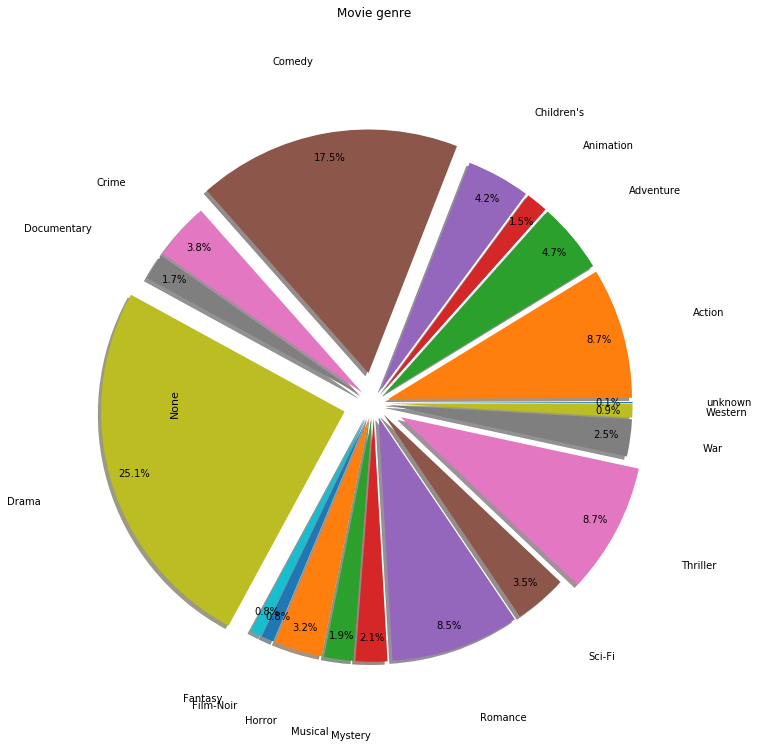

In [21]:
fig = plt.figure(figsize=(7,7))
plt.title('Movie genre',y=1.5)
movie.loc[:,'unknown':'Western'].sum().plot(kind='pie',autopct='%1.1f%%',shadow=True,radius=1.6,pctdistance=0.9,labeldistance=1.3,explode=ex)
plt.style.use('seaborn-notebook')

In [22]:
# There are two movie with unknown genre
movie[movie.unknown==1]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
rating[rating.movie_id==267]

,user_id,movie_id,rating
2172,130,267,5
3781,5,267,4
7245,268,267,3
12475,297,267,3
14756,319,267,4
15292,1,267,4
49295,532,267,3
93523,833,267,1
99723,422,267,4


In [24]:
rating[rating.movie_id==1373]

,user_id,movie_id,rating
8567,181,1373,1


In [25]:
#create a year column of the movie release
movie['release_date']  = pd.to_datetime(movie['release_date'], format='%d-%b-%Y')
movie['year']= movie['release_date'].dt.to_period('Y')

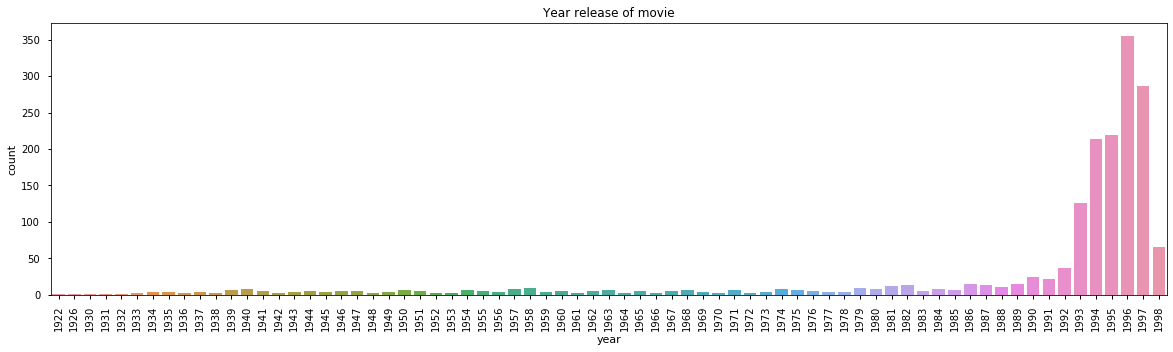

In [26]:
fig = plt.figure(figsize=(20,5))
sns.countplot(movie['year'].sort_values(ascending=True))
plt.xticks(rotation=90)
plt.title('Year release of movie')
plt.show()

## content base recommendation

In [27]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation

In [28]:
movie.set_index('movie_id',inplace=True)

In [29]:
movie.head()

,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [30]:
movie_genre = movie.loc[:,'unknown':'Western']
movie_genre.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [31]:
#normalize each genre
from sklearn.preprocessing import normalize
movie_genre_normalized = pd.DataFrame(normalize(movie_genre,axis=0))
movie_genre_normalized.columns=movie_genre.columns
movie_genre_normalized.index=movie_genre.index
movie_genre_normalized

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.154303,0.090536,0.044499,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.063119,0.086066,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
4,0.0,0.063119,0.000000,0.000000,0.000000,0.044499,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.095783,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1679,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.063628,0.0,0.063119,0.0,0.0
1680,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.063628,0.0,0.000000,0.0,0.0


In [32]:
def FindSimilarMovie(distance_method,movieID):
    #create new dataframe to store distance between movies
    allmovie = pd.DataFrame(movie_genre_normalized.index)
    #remove the input movieID from the all movie dataframe
    remaining_movie = allmovie[allmovie['movie_id']!=movieID]
    #calculate the distance for each movie comparing to the input movie
    remaining_movie['distance'] = remaining_movie['movie_id'].apply(lambda x:distance_method(movie_genre_normalized.loc[x],movie_genre_normalized.loc[movieID]))
    top_recommendation = remaining_movie.sort_values(['distance'],ascending=True).head(5)
    return top_recommendation['movie_id'].values
    

In [33]:
FindSimilarMovie(euclidean,5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([1069,  329,  332,  348, 1213])

In [34]:
FindSimilarMovie(cosine,5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([1208,  332,  100,  649, 1069])

In [35]:
FindSimilarMovie(correlation,5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([100, 332, 329, 649, 348])

In [36]:
#find the top N movie rated by the user
def topN_rated(userID):
    Top_movie_rated_peruser = rating[rating['user_id']==userID].sort_values('rating',ascending=False).head(3)
    movie_list = Top_movie_rated_peruser['movie_id'].values
    return movie_list

In [37]:
def topN_movie_recommendation_content(userID, distance_method,N=5):
    watched_list = rating[rating['user_id']==userID]['movie_id'].values
    
    movie_list = topN_rated(userID)
    final_movie_list = []
    for i in movie_list:
        similar_movie_list = FindSimilarMovie(distance_method,i)
        for j in similar_movie_list:
            final_movie_list.append(j)
            
    output = movie[movie.index.isin(set(final_movie_list))]
    output = output[~output.index.isin(watched_list)].head(N)
    
    return output[['movie_title','release_date','IMDb_URL']].set_index('release_date')

In [38]:
topN_movie_recommendation_content(186, euclidean, 5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,movie_title,IMDb_URL
release_date,,
1995-01-01,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...
1996-02-16,Taxi Driver (1976),http://us.imdb.com/M/title-exact?Taxi%20Driver...
1988-01-01,Die Hard (1988),http://us.imdb.com/M/title-exact?Die%20Hard%20...
1996-11-22,Sling Blade (1996),http://us.imdb.com/M/title-exact?Sling%20Blade...
1998-10-23,Apt Pupil (1998),http://us.imdb.com/Title?Apt+Pupil+(1998)


## collaborative base recommendation

In [39]:
# recommend movie to user according to similar user (depends on the rating they give)
rating_matrix=pd.pivot_table(rating,values='rating',index='user_id',columns='movie_id')
rating_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
from scipy.spatial.distance import hamming 

In [41]:
#create new user dataframe calculating the distance of other users
def similaruser(userID,K):
    alluser = pd.DataFrame(rating_matrix.index)
    alluser = alluser[alluser['user_id']!=userID]
    alluser['distance'] = alluser['user_id'].apply(lambda x: hamming(rating_matrix.loc[userID],rating_matrix.loc[x]))
    nearestuser_list = alluser.sort_values('distance',ascending=True)['user_id'].head(K).values
    return nearestuser_list

In [42]:
similaruser(186,5)

array([130, 796, 313, 551, 347])

In [43]:
def topN_movie_recommendation_collaborative(userID, N=5):
    nearestuser_list = similaruser(userID,10)
    new_matrix = rating_matrix[rating_matrix.index.isin(nearestuser_list)]
    avg_rating = new_matrix.apply(np.nanmean).dropna()
    watched_list = rating[rating['user_id']==userID]['movie_id'].values
    avg_rating = avg_rating[~avg_rating.index.isin(watched_list)]
    top_movieID = avg_rating.sort_values(ascending=False).index[:N]
    
    output = movie[movie.index.isin(set(top_movieID))]
    
    return output[['movie_title','release_date','IMDb_URL']].set_index('release_date')

In [44]:
topN_movie_recommendation_collaborative(186, N=5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/pandas/core/apply.py:296: RuntimeWarning: Mean of empty slice
  values, self.f, axis=self.axis, dummy=dummy, labels=labels


,movie_title,IMDb_URL
release_date,,
1996-06-21,Lone Star (1996),http://us.imdb.com/M/title-exact?Lone%20Star%2...
1951-01-01,"Streetcar Named Desire, A (1951)",http://us.imdb.com/M/title-exact?Streetcar%20N...
1993-01-01,Six Degrees of Separation (1993),http://us.imdb.com/M/title-exact?Six%20Degrees...
1978-01-01,Up in Smoke (1978),http://us.imdb.com/M/title-exact?Up%20in%20Smo...
1997-03-21,Selena (1997),http://us.imdb.com/M/title-exact?Selena%20(1997)


In [70]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [71]:
user.set_index('user_id',inplace=True)

In [72]:
dummy_table = pd.get_dummies(user[['gender','occupation']])
dummy_table.head()

,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
age_table = pd.DataFrame(user['age'])

In [74]:
user_background  = pd.concat([age_table,dummy_table],axis=1)
user_background.head()

,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
user_id,,,,,,,,,,,,,,,,,,,,,
1,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,23,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,33,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
#Normalization
user_background_normalized = pd.DataFrame(normalize(user_background,axis=0))
user_background_normalized.columns=user_background.columns
user_background_normalized.index=user_background.index
user_background_normalized.head()

,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.021609,0.000000,0.038633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.19245,0.000000
2,0.047721,0.060523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.09759,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.020709,0.000000,0.038633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.149071
4,0.021609,0.000000,0.038633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.19245,0.000000
5,0.029713,0.060523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.09759,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


In [76]:
def similaruser_background(userID,distance_method,K):
    alluser = pd.DataFrame(user_background_normalized.index)
    alluser = alluser[alluser['user_id']!=userID]
    alluser['distance'] = alluser['user_id'].apply(lambda x: distance_method(user_background_normalized.loc[userID],user_background_normalized.loc[x]))
    nearestuser_list = alluser.sort_values('distance',ascending=True)['user_id'].head(K).values
    return nearestuser_list

In [77]:
similaruser_background(186,euclidean,5)

array([835,  98, 769, 901, 284])

In [82]:
user_background[user_background.index.isin([835,  98, 769, 901, 284])]

,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
user_id,,,,,,,,,,,,,,,,,,,,,
98,49,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
284,40,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
769,39,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
835,44,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
901,38,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
rating_matrix[rating_matrix.index.isin([835,  98, 769, 901, 284])]

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
rating.index

RangeIndex(start=0, stop=100000, step=1)

In [87]:
def topN_movie_recommendation_userbackground(userID, distance_method, N=5):
    nearestuser_list = similaruser_background(userID,distance_method,10)
    new_matrix = rating_matrix[rating_matrix.index.isin(nearestuser_list)]
    avg_rating = new_matrix.apply(np.nanmean).dropna()
    watched_list = rating[rating['user_id']==userID]['movie_id'].values
    avg_rating = avg_rating[~avg_rating.index.isin(watched_list)]
    top_movieID = avg_rating.sort_values(ascending=False).index[:N]
    
    output = movie[movie.index.isin(set(top_movieID))]
    
    return output[['movie_title','release_date','IMDb_URL']].set_index('release_date')

In [93]:
topN_movie_recommendation_userbackground(186,cosine,N=5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/pandas/core/apply.py:296: RuntimeWarning: Mean of empty slice
  values, self.f, axis=self.axis, dummy=dummy, labels=labels


,movie_title,IMDb_URL
release_date,,
1994-01-01,Maverick (1994),http://us.imdb.com/M/title-exact?Maverick%20(1...
1998-01-09,Wag the Dog (1997),http://us.imdb.com/M/title-exact?imdb-title-12...
1996-02-09,"Bridges of Madison County, The (1995)",http://us.imdb.com/M/title-exact?Bridges%20of%...
1948-01-01,"Treasure of the Sierra Madre, The (1948)",http://us.imdb.com/M/title-exact?Treasure%20of...
1996-01-01,White Squall (1996),http://us.imdb.com/M/title-exact?White%20Squal...


In [90]:
topN_movie_recommendation_collaborative(186, N=5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/pandas/core/apply.py:296: RuntimeWarning: Mean of empty slice
  values, self.f, axis=self.axis, dummy=dummy, labels=labels


,movie_title,IMDb_URL
release_date,,
1996-06-21,Lone Star (1996),http://us.imdb.com/M/title-exact?Lone%20Star%2...
1951-01-01,"Streetcar Named Desire, A (1951)",http://us.imdb.com/M/title-exact?Streetcar%20N...
1993-01-01,Six Degrees of Separation (1993),http://us.imdb.com/M/title-exact?Six%20Degrees...
1978-01-01,Up in Smoke (1978),http://us.imdb.com/M/title-exact?Up%20in%20Smo...
1997-03-21,Selena (1997),http://us.imdb.com/M/title-exact?Selena%20(1997)


In [95]:
topN_movie_recommendation_content(186, euclidean, 5)

/opt/anaconda3/envs/FTDS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,movie_title,IMDb_URL
release_date,,
1995-01-01,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...
1996-02-16,Taxi Driver (1976),http://us.imdb.com/M/title-exact?Taxi%20Driver...
1988-01-01,Die Hard (1988),http://us.imdb.com/M/title-exact?Die%20Hard%20...
1996-11-22,Sling Blade (1996),http://us.imdb.com/M/title-exact?Sling%20Blade...
1998-10-23,Apt Pupil (1998),http://us.imdb.com/Title?Apt+Pupil+(1998)
